<a href="https://colab.research.google.com/github/iakovkh/mypython/blob/main/LSTM_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


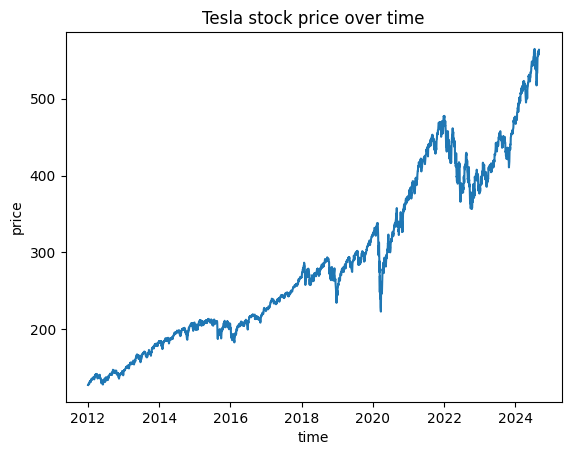

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - loss: 0.0295
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 0.0027
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - loss: 0.0024
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - loss: 0.0026
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - loss: 0.0020
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - loss: 0.0018
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 0.0018
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - loss: 0.0018
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 0.0018
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - loss: 0.0016


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step


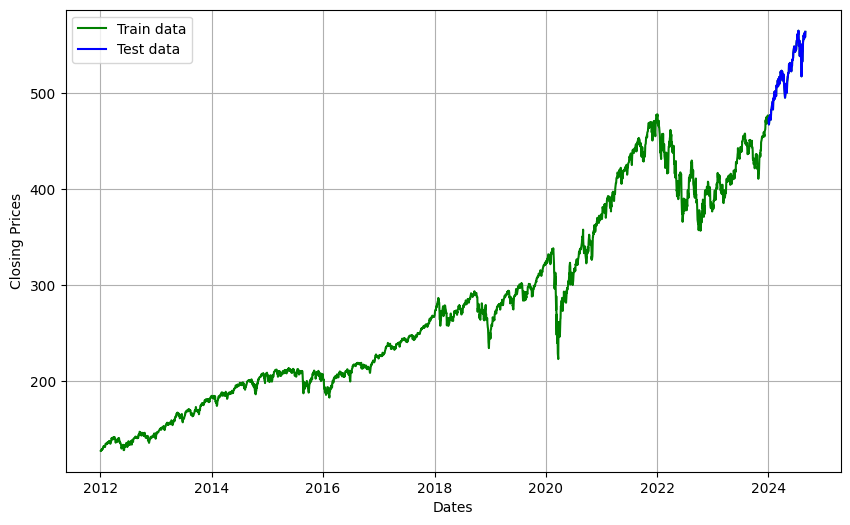

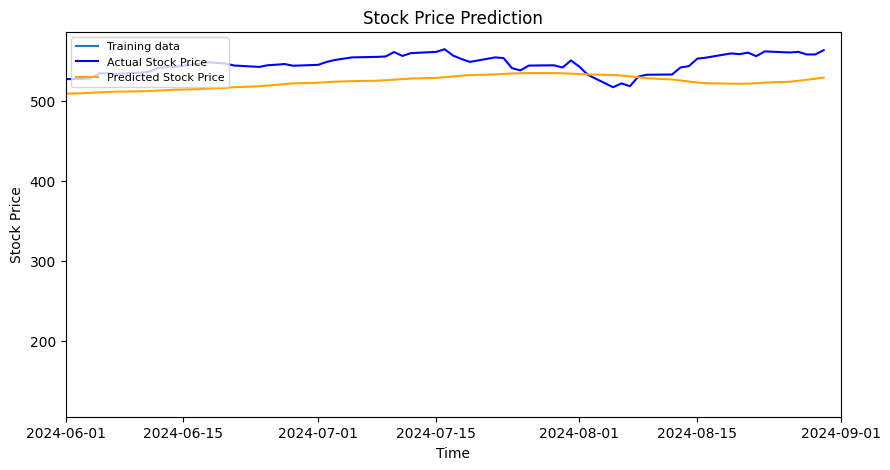

MSE: 521.0893028560095
MAE: 20.27524651421441
RMSE: 22.827380551784945
MAPE: 0.04515228988548174


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# download data using Yahoo finance API
df = yf.download('SPY').reset_index()
df = df[(df['Date'] >= "2012-01-01") & (df['Date'] <= "2024-09-01")].reset_index(drop=True)

# plot closing price over time
plt.plot(df["Date"], df["Close"])
plt.title("Tesla stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

# scaling the closing price
# MinMaxScaler => y = (y - min(y))/(min(y) - max(y))
scaler = MinMaxScaler(feature_range=(0,1))
df['scaled_values'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# split data into train and training set
train_data = df[df['Date'] < '2024-01-01']
test_data = df[df['Date'] >= '2024-01-01']

# plotting the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Date'], df['Close'], 'green', label='Train data')
plt.plot(test_data['Date'], test_data['Close'], 'blue', label='Test data')
plt.legend()

x_train = []
y_train = []

for i in range(60, len(train_data['scaled_values'])):
    x_train.append(train_data['scaled_values'][i-60:i])
    y_train.append(train_data['scaled_values'][i])

x_train, y_train = np.array(x_train), np.array(y_train)

# converting it back to 3D array as required by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_test = []
y_test = test_data['scaled_values']

for i in range(60, len(test_data)):
    x_test.append(test_data['scaled_values'][i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# define model architecture

# Initialize model
model = Sequential()

# LSTM layer 1
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.25))

# LSTM layer 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

# LSTM layer 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

# LSTM layer 4
model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# final layer
model.add(Dense(units = 1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 10, batch_size = 32)

# predict on test data
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# plot all the series together
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data['Date'], train_data['Close'], label='Training data')
plt.plot(test_data['Date'], test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(test_data[60:]['Date'], predicted_stock_price, color = 'orange',label='Predicted Stock Price')

# Set the x-axis limits to the desired date range
plt.xlim(pd.Timestamp('2024-06-01'), pd.Timestamp('2024-09-01'))

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

from sklearn.metrics import mean_absolute_error
import math

y_true = test_data[60:]['Close'].values
y_pred = predicted_stock_price

# report performance
mse = mean_squared_error(y_true, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
print('MAPE: '+str(mape))